Epoch 0, Loss: 0.4303
Epoch 100, Loss: 0.0101
Epoch 200, Loss: 0.0037
Epoch 300, Loss: 0.0022
Epoch 400, Loss: 0.0015
Epoch 500, Loss: 0.0011
Epoch 600, Loss: 0.0009
Epoch 700, Loss: 0.0007
Epoch 800, Loss: 0.0006
Epoch 900, Loss: 0.0006


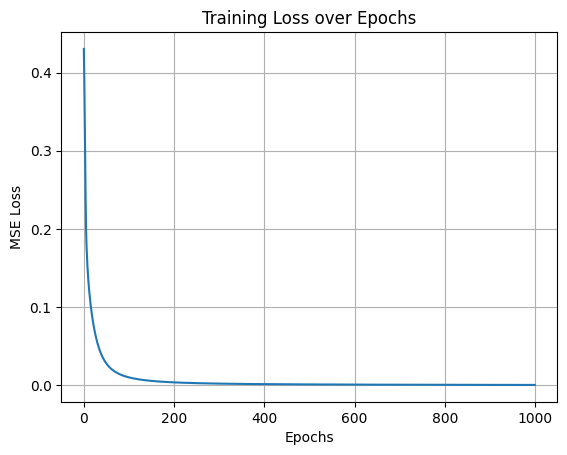

Actual: A, Predicted: A


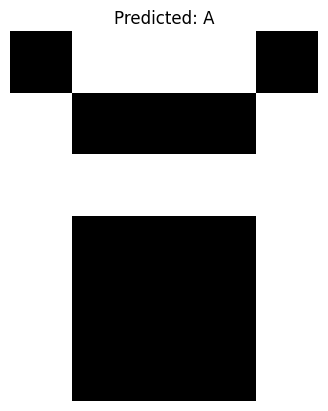

Actual: B, Predicted: B


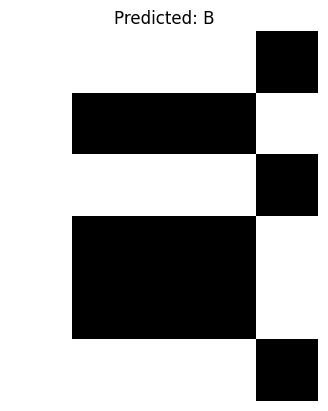

Actual: C, Predicted: C


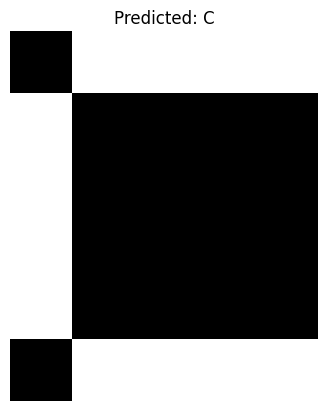

In [1]:
import numpy as np
import matplotlib.pyplot as plt

A = [
    [0,1,1,1,0],
    [1,0,0,0,1],
    [1,1,1,1,1],
    [1,0,0,0,1],
    [1,0,0,0,1],
    [1,0,0,0,1]
]

B = [
    [1,1,1,1,0],
    [1,0,0,0,1],
    [1,1,1,1,0],
    [1,0,0,0,1],
    [1,0,0,0,1],
    [1,1,1,1,0]
]

C = [
    [0,1,1,1,1],
    [1,0,0,0,0],
    [1,0,0,0,0],
    [1,0,0,0,0],
    [1,0,0,0,0],
    [0,1,1,1,1]
]

def flatten(letter):
    return np.array(letter).flatten()

X = np.array([flatten(A), flatten(B), flatten(C)])
y = np.array([
    [1, 0, 0],
    [0, 1, 0],
    [0, 0, 1]
])

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

def mse_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

input_size = 30
hidden_size = 10
output_size = 3
lr = 0.5
epochs = 1000

np.random.seed(42)
W1 = np.random.randn(input_size, hidden_size)
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size)
b2 = np.zeros((1, output_size))

losses = []

for epoch in range(epochs):
    z1 = np.dot(X, W1) + b1
    a1 = sigmoid(z1)
    z2 = np.dot(a1, W2) + b2
    a2 = sigmoid(z2)

    loss = mse_loss(y, a2)
    losses.append(loss)

    error = a2 - y
    d_output = error * sigmoid_derivative(a2)
    
    error_hidden = np.dot(d_output, W2.T)
    d_hidden = error_hidden * sigmoid_derivative(a1)

    W2 -= lr * np.dot(a1.T, d_output)
    b2 -= lr * np.sum(d_output, axis=0, keepdims=True)
    W1 -= lr * np.dot(X.T, d_hidden)
    b1 -= lr * np.sum(d_hidden, axis=0, keepdims=True)

    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.4f}")

plt.plot(losses)
plt.title("Training Loss over Epochs")
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.grid(True)
plt.show()

def predict(letter_vector):
    z1 = np.dot(letter_vector, W1) + b1
    a1 = sigmoid(z1)
    z2 = np.dot(a1, W2) + b2
    a2 = sigmoid(z2)
    return np.argmax(a2)

labels = ['A', 'B', 'C']

for i, letter in enumerate([A, B, C]):
    img = np.array(letter)
    flat = flatten(letter)
    pred = predict(flat)
    
    print(f"Actual: {labels[i]}, Predicted: {labels[pred]}")
    plt.imshow(img, cmap='gray')
    plt.title(f"Predicted: {labels[pred]}")
    plt.axis('off')
    plt.show()
